In [3]:
import pandas as pd #do pracy z danymi w tabelkach
import matplotlib.pyplot as mp #wykresy
import seaborn as sb #bardzije zaawansowane wykresy
import numpy as np #do pracy z macierzami
import datetime #do pracy z datami

today = datetime.date.today().isoformat()


In [4]:
#dane z Airly

print(f"Today is {today}")
airly = pd.read_csv(f"../data/processed/airly/airly_{today}.csv")
airly = airly.dropna() #usuwamy wiersze z brakującymi danymi


Today is 2025-07-01


In [ ]:
airly.info()
airly.head(20)
airly.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fromDateTime  150 non-null    object 
 1   tillDateTime  150 non-null    object 
 2   parameter     150 non-null    object 
 3   value         150 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


,fromDateTime,tillDateTime,parameter,value
0,2025-07-01T14:43:39.613Z,2025-07-01T15:43:39.613Z,PM1,0.28
1,2025-07-01T14:43:39.613Z,2025-07-01T15:43:39.613Z,PM25,0.52
2,2025-07-01T14:43:39.613Z,2025-07-01T15:43:39.613Z,PM10,0.87
3,2025-07-01T14:43:39.613Z,2025-07-01T15:43:39.613Z,PRESSURE,1018.62
4,2025-07-01T14:43:39.613Z,2025-07-01T15:43:39.613Z,HUMIDITY,36.81
5,2025-07-01T14:43:39.613Z,2025-07-01T15:43:39.613Z,TEMPERATURE,24.35
6,2025-06-30T15:00:00.000Z,2025-06-30T16:00:00.000Z,PM1,1.65
7,2025-06-30T15:00:00.000Z,2025-06-30T16:00:00.000Z,PM25,2.50
8,2025-06-30T15:00:00.000Z,2025-06-30T16:00:00.000Z,PM10,3.84
9,2025-06-30T15:00:00.000Z,2025-06-30T16:00:00.000Z,PRESSURE,1016.78


--------------AIRLY----------------

In [6]:
#dodawanie kolumny z pełną godziną (np. 06:00)
airly["fromDateTime"] = pd.to_datetime(airly["fromDateTime"])
airly["hour"] = airly["fromDateTime"].dt.floor("H")


C:\Users\Szymon\AppData\Local\Temp\ipykernel_21608\337824556.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  airly["hour"] = airly["fromDateTime"].dt.floor("H")


In [7]:
#przekształcenie danych: godzina jako indeks, parametry jako kolumny
airly_pivoted = airly.pivot_table(
    index="hour", # indeksujemy po pełnej godzinie tak aby kadza godzina byla unikalna
    columns="parameter", # wartości tej kolumny staną się nagłówkami kolumn
    values="value" # te wartosci beda wypełniały tabelę
).reset_index()


In [8]:
#(poprawa wyświetlania danych, tak zeby wsztysko bylo w jednym wierszu)
pd.set_option("display.max_columns", 20)     #pokaż więcej kolumn

print(airly_pivoted.head(20))


parameter                      hour  HUMIDITY   PM1   PM10  PM25  PRESSURE  \
0         2025-06-30 15:00:00+00:00     39.70  1.65   3.84  2.50   1016.78   
1         2025-06-30 16:00:00+00:00     42.28  1.86   4.31  2.80   1016.61   
2         2025-06-30 17:00:00+00:00     46.22  1.87   4.32  2.75   1016.59   
3         2025-06-30 18:00:00+00:00     52.55  2.60   5.58  3.70   1016.85   
4         2025-06-30 19:00:00+00:00     57.39  3.84   7.92  5.35   1017.65   
5         2025-06-30 20:00:00+00:00     62.00  4.64   9.25  6.39   1018.19   
6         2025-06-30 21:00:00+00:00     67.38  5.26  10.33  7.11   1018.49   
7         2025-06-30 22:00:00+00:00     71.78  4.83   9.77  6.76   1018.96   
8         2025-06-30 23:00:00+00:00     75.32  4.62   9.79  6.69   1019.22   
9         2025-07-01 00:00:00+00:00     77.18  3.62   7.71  5.13   1019.64   
10        2025-07-01 01:00:00+00:00     78.45  2.51   5.40  3.59   1020.05   
11        2025-07-01 02:00:00+00:00     78.90  1.69   3.69  2.46

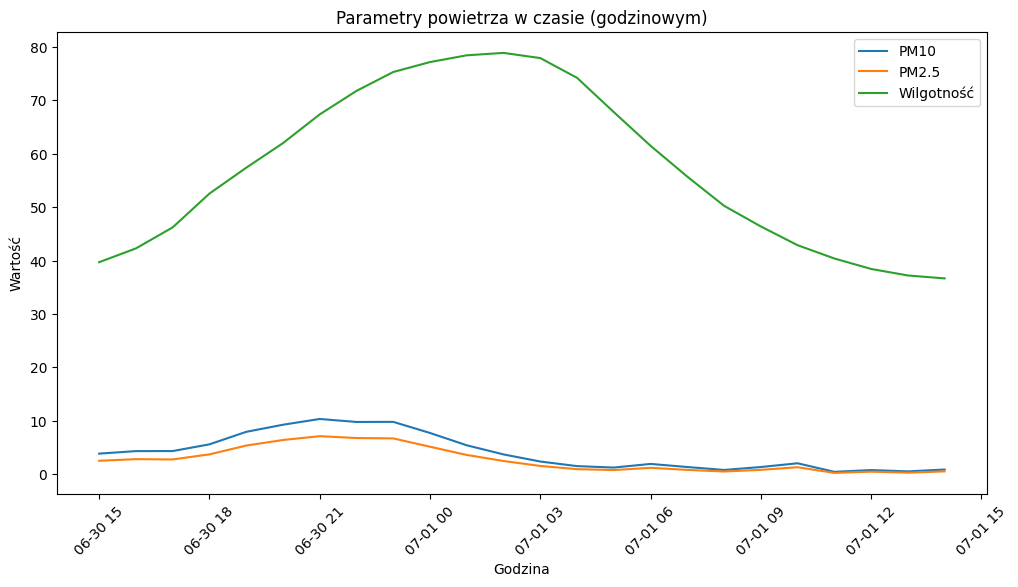

In [9]:
mp.figure(figsize=(12,6)) #rozmiar wykresu
mp.plot(airly_pivoted["hour"], airly_pivoted["PM10"], label="PM10") #os X to godzina, oś Y to wartość PM10, label to nazwa danego parametru
mp.plot(airly_pivoted["hour"], airly_pivoted["PM25"], label="PM2.5") #ta sama zasada
mp.plot(airly_pivoted["hour"], airly_pivoted["HUMIDITY"], label="Wilgotność")
mp.legend() #doawanie legendy
mp.title("Parametry powietrza w czasie (godzinowym)") #tytuł wykresu
mp.xlabel("Godzina") #opis osi X
mp.ylabel("Wartość") #opis osi Y
mp.xticks(rotation=45) #obrócienie dat i cazsu o 45 stopni dla lepszej widoczniosci
mp.show() #wyswietlanie wykresu
